# Linear Regression Models

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [4]:
# Read in the data

url = 'https://www.engineeringtoolbox.com/standard-atmosphere-d_604.html'
df_list = pd.read_html( url )
df_list[1]




,Geo potential Altitude above Sea Level - h - (m),Temperature - t - (oC),Acceleration of Gravity - g - (m/s2),Absolute Pressure - p - (104 N/m2),Density - ρ - (kg/m3),Dynamic Viscosity - μ - (10-5 N s/m2)
0,-1000,21.50,9.810,11.390000,1.347000,1.821
1,0,15.00,9.807,10.130000,1.225000,1.789
2,1000,8.50,9.804,8.988000,1.112000,1.758
3,2000,2.00,9.801,7.950000,1.007000,1.726
4,3000,-4.49,9.797,7.012000,0.909300,1.694
5,4000,-10.98,9.794,6.166000,0.819400,1.661
6,5000,-17.47,9.791,5.405000,0.736400,1.628
7,6000,-23.96,9.788,4.722000,0.660100,1.595
8,7000,-30.45,9.785,4.111000,0.590000,1.561
9,8000,-36.94,9.782,3.565000,0.525800,1.527


In [7]:
# plot the data

df_list.plot('Density',fmt='o')
plt.xlabel('Density')
plt.ylabel('Density')
plt.title('Density of Air')
plt.show()

AttributeError: 'list' object has no attribute 'plt'

Observations:

There appears to be a slight linear trend that associates higher alcohol sales with higher tobacco sales.  The data point corresponding to Northern Ireland appears to be an outlier (it has the lowest alcohol sales and the highest tobacco sales.

Let's do some analysis that first determines if it is reasonable to consider removing Northern Ireland from this data set.

In [ ]:
result = sm.ols('Density',df_list,).fit()
print (result.summary())

PatsyError: ignored

## Summary of information in the regression result table

### Top Left Column:

This section is fairly self explanatory.  It reports the dependent variable (i.e. the y-axis variable), along with the relevant degrees of freedom.  For our purposes here, Df Residuals (= $\nu_{error}$) and Df Model (=$\nu_{treatment}$) are the most important results.

### Top Right Column:

In this section, several important parameters are reported that are related to the statistical significance of
the linear fit.  The F-statistic and the Prob (F-statistic), or p-value, are already familar to us.  We will
discuss some of the others as we go along in the analysis.

### Bottom Table

In a linear fit, there are two parameters - the slope and the y-intercept.  The "best fit" values for these parameters are given in this table (coef), along with the uncertainties (std err) on each of these values.  This table also shows the t-values associated with these values ... a t-value of zero would indicate that the expected value of the parameter is zero, for example.  So, in this case, we see that the analysis shows that we can say that the y-intercept is statistically different from zero (P_intercept = 0.024), but the slope is not (P_slope = 0.509).  We see this is consistent with the 95% confidence interval limits given in this table as well.

In [ ]:
# Extract information from the result object and plot along with the data.

yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

NameError: ignored

In [ ]:
yfit = yint + slope*df['Density']
x = df['Density']

df.plot('Density','Density',style='o')
plt.ylabel('Density')
plt.title('Density of Air')
plt.plot(x,yfit)
plt.show()

NameError: ignored

## The key here is that we really need to include somehow the UNCERTAINTIES in the parameters in plotting the fit.  Otherwise, our fit is totally useless!!!!!

It turns out that it is actually quite a difficult mathematical exercise to do this.  Fortunately, Python has some utilities to help us.  Someday, maybe you will learn in detail why this works the way that it does (and you should).  But for now, we are going to just trust in the folks that wrote the software and assume that they got it right (which they did).

In [ ]:
import seaborn as sns
sns.regplot('Density', df_list, ci=95.00)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]*e*paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(df['Density'])
y = np.array(df['Density'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(2.5,5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

#plt.plot(xi,lower)
#plt.plot(xi,upper)
plt.show()

ValueError: ignored

## Conclusion:  We are more than 99.99% sure that Northern Ireland is an outlier.  Let's remove it from the data set!

In [ ]:
result = sm.ols('Density',df_list[:-1],).fit()
print (result.summary())

PatsyError: ignored

4.351168486048515 0.3019383581272961 0.049984490275868376
Coefficients (from curve_fit)
[2.04122312 1.00589582]
Covariance Matrix (from curve_fit)
[[ 1.0027222  -0.2788958 ]
 [-0.2788958   0.07914183]]


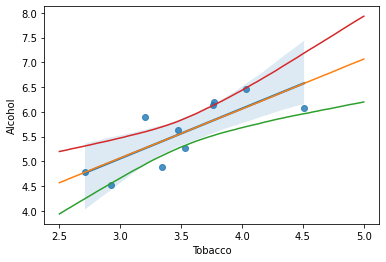

In [ ]:
# Extract information from the result object and plot along with the data.

yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

import seaborn as sns
sns.regplot('Density', 'Density', df[:-1], ci=95)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(df['Density'][:-1])
y = np.array(df['Density'][:-1])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(2.5,5.0,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

## Conclusion:  For these 10 regions, there is a statistically significant correlaton between alcohol and tobacco sales (p = 0.007).

So, the next question is, what is the connection between this analysis and the one-way ANOVA analysis that we could have performed on this data?  Let's find out!

In [ ]:
N_model = 2
v_model = N_model - 1

print (df['Density'][:-1])

N = len(df['Density'][:-1])
v_total = N - 1
v_error = v_total - v_model

print ("v_total, v_model, v_error = ", v_total,v_model,v_error)

0    4.03
1    3.76
2    3.77
3    3.34
4    3.47
5    2.92
6    3.20
7    2.71
8    3.53
9    4.51
Name: Tobacco, dtype: float64
v_total, v_model, v_error =  9 1 8


In [ ]:
SS_total = (N-1)*df['Density'][:-1].var()

SS_model = r2*SS_total

SS_error = SS_total - SS_model

print (SS_total, SS_model, SS_error)

NameError: ignored

In [ ]:
# Proceed with normal ANOVA from here
MS_model = SS_model/v_model
MS_error = SS_error/v_error

fSN = MS_model/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(v_model,v_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

pvalue = (1-fdist.cdf(fSN))
    
print ("Pvalue = %0.3f" % (pvalue))

# print table

print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("Model      %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_model,SS_model,MS_model,fSN,pvalue))
print ("Error      %0.0f       %0.2f           %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f       %0.2f" %(v_total,SS_total))

NameError: ignored

In [ ]:
# Let's go back and look at the full data set (with Northern Ireland included)

result = sm.ols('Density',df,).fit()
print (result.summary())

NameError: ignored

In [ ]:
# Extract information from the result object and plot along with the data.

yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

N_model = 2
v_model = N_model - 1

N = len(df['Density'])
v_total = N - 1
v_error = v_total - v_model

print ("v_total, v_model, v_error = ", v_total,v_model,v_error)

SS_total = (N-1)*df['Density'].var()

SS_model = r2*SS_total

SS_error = SS_total - SS_model

print (SS_total, SS_model, SS_error)

# Proceed with normal ANOVA from here
MS_model = SS_model/v_model
MS_error = SS_error/v_error

fSN = MS_model/MS_error

print ("F Signal/Noise = %0.2f " % fSN)

alpha = 0.05

fdist = stats.f(v_model,v_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.2f" % (fhigh))

pvalue = 1-fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

# print table

print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("Model      %0.0f       %0.2f           %0.2f        %0.2f    %0.3f" %(v_model,SS_model,MS_model,fSN,pvalue))
print ("Error      %0.0f       %0.2f           %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f       %0.2f" %(v_total,SS_total))

NameError: ignored

I was able to extract the table from the html website but had difficulty with parts b-d.

I used the website below for help on how to extract the table from the website.
https://www.marsja.se/how-to-use-pandas-read_html-to-scrape-data-from-html-tables/